In [57]:
from torch_geometric.data import Data
import torch
import numpy as np

In [75]:
edge_index = torch.tensor([[3,5,6,2,4],[5,3,2,6,6]],dtype=torch.long)
x = torch.tensor([[1,2,3],[4,5,6],[7,8,9],[10,11,12],[13,14,15],[1,33,4],[12, 4, 2]],dtype=torch.float)
y = torch.tensor([0,1,0,1,0,0,1],dtype=torch.long)
data = Data(x=x,edge_index=edge_index,y=y)

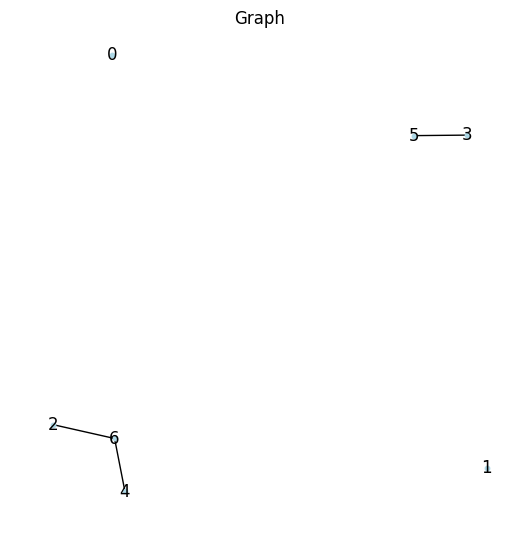

In [76]:
#convert graph to networkx
import networkx as nx
import matplotlib.pyplot as plt
from torch_geometric.utils import to_networkx

#convert to networkx with node attributes
G = to_networkx(data, to_undirected=True)
#plot
plt.figure(figsize=(5,5))
pos = nx.spring_layout(G)
nx.draw(G,pos,node_size=10,node_color='lightblue',with_labels=True)
plt.title('Graph')
plt.show()


In [61]:
from torch_geometric.utils import *

H = subgraph(edge_index=data.edge_index, subset=[[1,2,4,6]], relabel_nodes=False)

In [62]:
data.edge_index

tensor([[3, 5, 6, 2, 4],
        [5, 3, 2, 6, 6]])

In [63]:
H

(tensor([[6, 2, 4],
         [2, 6, 6]]),
 None)

In [64]:
data.x

tensor([[ 1.,  2.,  3.],
        [ 4.,  5.,  6.],
        [ 7.,  8.,  9.],
        [10., 11., 12.],
        [13., 14., 15.],
        [ 1., 33.,  4.],
        [12.,  4.,  2.]])

In [65]:
#create a new x tensor with node 1,2,4,6
data.x[[1,2,4,6]]


tensor([[ 4.,  5.,  6.],
        [ 7.,  8.,  9.],
        [13., 14., 15.],
        [12.,  4.,  2.]])

In [66]:
list_of_nodes = [1,2,4,6]

In [82]:
subgraph_edge_index = subgraph(edge_index=data.edge_index, subset=torch.tensor(list_of_nodes), relabel_nodes=True)

In [84]:
M = Data(x=data.x[list_of_nodes],edge_index=subgraph_edge_index[0], y=data.y[list_of_nodes], mapping={int(value): i for i, value in enumerate(list_of_nodes)})

In [88]:
M.num_nodes

4

In [86]:
M.edge_index, M.mapping

(tensor([[3, 1, 2],
         [1, 3, 3]]),
 {1: 0, 2: 1, 4: 2, 6: 3})

In [87]:
for key, value in M.mapping.items():
    print(key, value)

1 0
2 1
4 2
6 3
